# 1/ Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('data/filtered_lyrics.csv', encoding='utf-8')
df.head()

In [ ]:
print(df.shape)

In [ ]:
# Đếm số lần xuất hiện của từng giá trị trong cột 'genre'
genre_counts = df["genre"].value_counts()

# In ra số lượng từng thể loại
print(genre_counts)

# In ra tổng số thể loại khác nhau
print(f"📌 Tổng số thể loại trong cột 'genre': {genre_counts.shape[0]}")

In [ ]:
# Danh sách các thể loại cần kiểm tra
genres = ["Rock", "Pop", "Hip-Hop", "Country", "Jazz"]


# Hàm kiểm tra thể loại nào có trong mỗi dòng
def check_multiple_genres(genre_text):
    if pd.isna(genre_text):  # Nếu giá trị NaN thì bỏ qua
        return []
    return [g for g in genres if g in genre_text]


# Áp dụng kiểm tra cho từng dòng
df["detected_genres"] = df["genre"].apply(check_multiple_genres)

# Lọc ra các dòng có nhiều hơn một thể loại
df_multiple_genres = df[df["detected_genres"].str.len() > 1]

# Hiển thị kết quả
print(f"📌 Số dòng có nhiều thể loại: {df_multiple_genres.shape[0]}")
print(df_multiple_genres[["genre", "detected_genres"]].head())

# 2/ Pre-processing

In [ ]:
import os

# Số lượng bài hát cần lấy từ mỗi thể loại
num_songs = 5000
df = df.groupby("genre").head(num_songs)
path = "data/filtered_lyrics_5000_each_genre.csv"

# Lưu vào file mới
if os.path.exists(path):
    print(f"⚠️ File {path} đã tồn tại, sẽ ghi đè!")
else:
    print(f"✅ Tạo file mới: {path}")

df.to_csv(path, index=False, encoding="utf-8")
print(f"✅ File đã được ghi: {path}")

In [ ]:
# Kiểm tra lại số lượng bài hát mỗi thể loại sau khi lọc
print(df["genre"].value_counts())

In [ ]:
# Thông tin chung (số dòng, kiểu dữ liệu, cột null)
print("\t 🔍 THÔNG TIN DỮ LIỆU:")
print(df.info())
print("-" * 50)

# Số lượng giá trị thiếu trong mỗi cột
print("\t ⚠️ GIÁ TRỊ THIẾU:")
print(df.isnull().sum())
print("-" * 50)

# Số dòng trùng lặp
print("\t 🔄 DỮ LIỆU TRÙNG LẶP:")
print(df.duplicated().sum())

In [ ]:
# Keeping necessaries column data
columns_to_keep = ["song", "lyrics", "genre"]
df = df[columns_to_keep]

# In kết quả sau khi xử lý
print("\n" + "=" * 50)
print("📌 DỮ LIỆU SAU KHI GIỮ LẠI CỘT QUAN TRỌNG")
print("=" * 50)
df.head()

* Data pre-processing

In [35]:
def load_contractions(path_to_load):
    contractions_dict = {}
    with open(path_to_load, "r", encoding="utf-8") as file:
        for line in file:
            short, full = line.strip().split("=")
            contractions_dict[short] = full
    return contractions_dict


# Đọc từ file
CUSTOM_CONTRACTIONS = load_contractions("custom/custom_contractions.txt")

print(CUSTOM_CONTRACTIONS)

{"'til": 'until', "' til": 'until', "'till": 'until', "' till": 'until', '’til': 'until', '’ til': 'until', '’till': 'until', '’ till': 'until', "'round": 'around', "' round": 'around', '’round': 'around', '’ round': 'around', "'bout": 'about', "' bout": 'about', '’bout': 'about', '’ bout': 'about', "'cause": 'because', "' cause": 'because', '’cause': 'because', '’ cause': 'because', "gon'": 'going to', 'gonna': 'going to', 'wanna': 'want to', 'lemme': 'let me', 'gimme': 'give me', "ain't": 'is not', "y'all": 'you all', 'yall': 'you all', 'ya': 'you', 'cuz': 'because', 'coz': 'because', 'cus': 'because', 'hafta': 'have to', 'gotta': 'got to', 'outta': 'out of', 'dunno': 'do not know', 'kinda': 'kind of', 'sorta': 'sort of', 'woulda': 'would have', 'shoulda': 'should have', 'coulda': 'could have'}


In [36]:
import re


def load_remove(path_to_load):
    remove_list = set()
    with open(path_to_load, "r", encoding="utf-8") as file:
        for line in file:
            word = line.strip()
            if word:
                remove_list.add(re.escape(word))
    return remove_list


# Đọc từ file
CUSTOM_REMOVE = load_remove("custom/custom_remove.txt")

print(CUSTOM_REMOVE)

{'\\-uh', 'eh\\-', 'uh\\.', 'ooh!', 'hey,', 'uh\\-', 'eh,', 'oh\\.', '\\-hey', 'hey\\.', 'uh!', 'ooh\\-', ',ooh', 'eh', ',oh', 'oh!', 'oh\\?', 'ooh', 'uh', ',hey', ',uh', '\\-eh', 'ooh,', 'uh\\?', 'hey!', '\\-ooh', 'oh,', 'oh', 'uh,', 'hey\\?', '\\-oh', ',eh', 'hey', 'hey\\-', 'eh\\?', 'eh!', 'oh\\-', 'eh\\.', 'ooh\\?', 'ooh\\.'}


In [37]:
import contractions
import spacy
import inflect

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Tạo engine để chuyển số thành chữ
p = inflect.engine()


# Remove stopwords with spaCy
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])


# Lemmatization with spaCy
def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])


# Preprocessing
def preprocess(text):
    if pd.isna(text):
        return ""

    lyrics_preprocess = text.lower().strip()

    lyrics_preprocess = re.sub(r'\d+', lambda x: p.number_to_words(x.group()), lyrics_preprocess)

    pattern = r"\b(" + "|".join(CUSTOM_REMOVE) + r")\b"
    lyrics_preprocess = re.sub(pattern, "", lyrics_preprocess, flags=re.IGNORECASE)

    lyrics_preprocess = lyrics_preprocess.replace("in'", "ing").replace("in '", "ing")
    lyrics_preprocess = lyrics_preprocess.replace("in’", "ing").replace("in ’", "ing")
    for short, full in CUSTOM_CONTRACTIONS.items():
        lyrics_preprocess = lyrics_preprocess.replace(short, full)

    lyrics_preprocess = contractions.fix(lyrics_preprocess)
    lyrics_preprocess = re.sub(r"[`’']", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"<.*?>", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"\[[0-9]*\]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"\b(chorus|verse)\b", "", lyrics_preprocess, flags=re.IGNORECASE)
    lyrics_preprocess = re.sub(r"[^\w\s]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"[,:?\[\]{}\-+\\/|@#$*^&%~!();\"]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"x[1-9]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"\s+", " ", lyrics_preprocess).strip()

    lyrics_preprocess = remove_stopwords(lyrics_preprocess)
    lyrics_preprocess = lemmatize(lyrics_preprocess)

    return lyrics_preprocess

In [ ]:
# Chạy preprocessing và lưu vào CSV
print("🚀 Đang xử lý lyrics...")
df["clean_lyrics"] = df["lyrics"].apply(preprocess)
df.to_csv("/content/drive/MyDrive/dataset/filtered_lyrics_5000_each_genre.csv", index=False)

df.head()

In [38]:
import pandas as pd

df = pd.read_csv('data/filtered_lyrics_5000_each_genre.csv', encoding='utf-8')
df.head()

,song,lyrics,genre,clean_lyrics
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...


* Data Analysis

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def data_analysis(df_analysis):
    # Lấy danh sách tất cả thể loại (distinct)
    all_genres_list = df_analysis["genre"].dropna().unique()

    # Danh sách lưu dữ liệu để vẽ biểu đồ
    average_word_list = []
    unique_word_list = []
    genre_list = []

    with open("out.txt", "w") as f:
        for genre in all_genres_list:
            genre_list.append(genre)

            # Lọc dữ liệu theo thể loại
            subset_df = df_analysis[df_analysis["genre"] == genre]

            # Số lượng bài hát trong thể loại
            number_of_songs = len(subset_df)
            if number_of_songs == 0:
                continue  # Bỏ qua nếu không có bài hát

            # Tách lyrics thành từ
            all_words = subset_df["lyrics"].dropna().str.split().explode()

            # Đếm số từ và số từ duy nhất
            word_counts = all_words.value_counts()
            total_no_of_words = word_counts.sum()
            total_unique_words = len(word_counts)

            # Tính số từ trung bình và số từ duy nhất trung bình
            average_words = total_no_of_words / number_of_songs if number_of_songs > 0 else 0
            average_unique_words = total_unique_words / number_of_songs if number_of_songs > 0 else 0

            # Lấy 10 từ phổ biến nhất
            top_ten_wordcount = word_counts.head(10)

            # Lưu dữ liệu để vẽ biểu đồ
            average_word_list.append(average_words)
            unique_word_list.append(average_unique_words)

            # Ghi dữ liệu vào file
            f.write(f"For genre {genre}\n")
            f.write(f"Total number of songs: {number_of_songs}\n")
            f.write(f"Total words in the genre: {total_no_of_words}\n")
            f.write(f"Average number of words per song: {average_words:.2f}\n")
            f.write(f"Average number of unique words per song: {average_unique_words:.2f}\n")
            f.write(f"Top ten most frequent words: {list(top_ten_wordcount.index)}\n")
            f.write("-" * 50 + "\n")

            # 📌 Vẽ Word Cloud cho từng thể loại
            text = " ".join(subset_df["lyrics"].dropna())  # Gộp tất cả lyrics lại
            wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

            # Hiển thị Word Cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")  # Tắt trục
            plt.title(f"Word Cloud for {genre}", fontsize=14)
            plt.show()

    # 📌 Vẽ biểu đồ số từ trung bình
    y_pos = np.arange(len(genre_list))

    plt.figure(figsize=(12, 6))
    plt.bar(y_pos, average_word_list, alpha=0.7, color='blue')
    plt.xticks(y_pos, genre_list, rotation=45)
    plt.ylabel('Average number of words per song')
    plt.title('Average Words by Genre')
    plt.show()

    # 📌 Vẽ biểu đồ số từ duy nhất trung bình
    plt.figure(figsize=(12, 6))
    plt.bar(y_pos, unique_word_list, alpha=0.7, color='green')
    plt.xticks(y_pos, genre_list, rotation=45)
    plt.ylabel('Unique words per song')
    plt.title('Unique Words by Genre')
    plt.show()

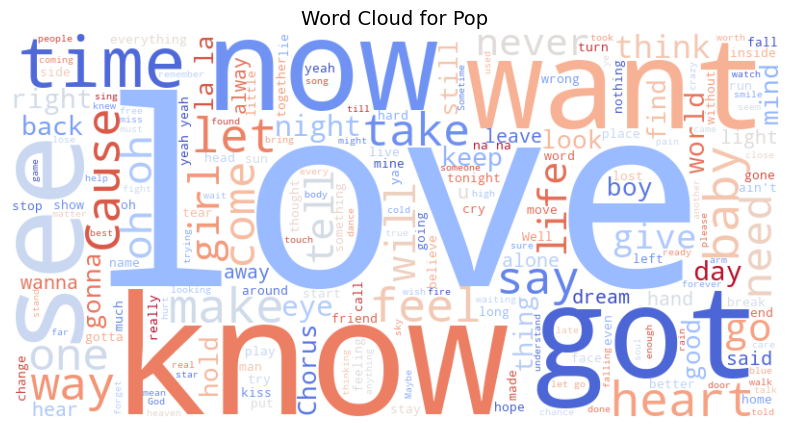

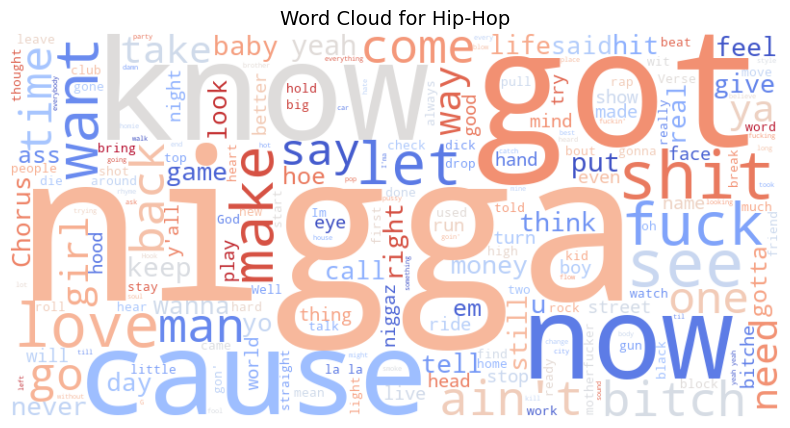

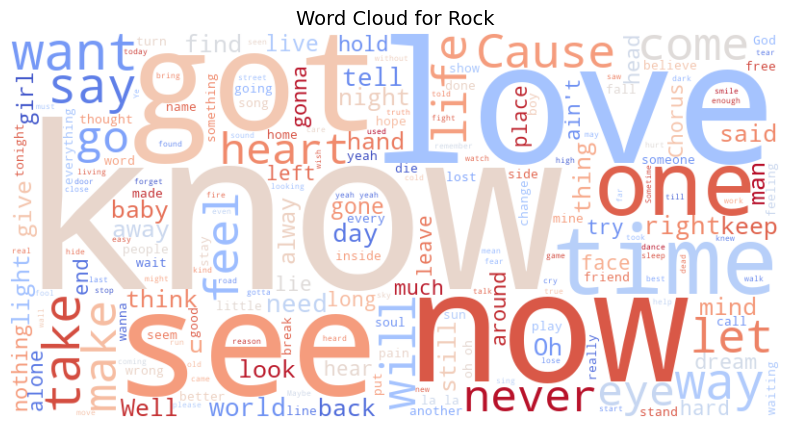

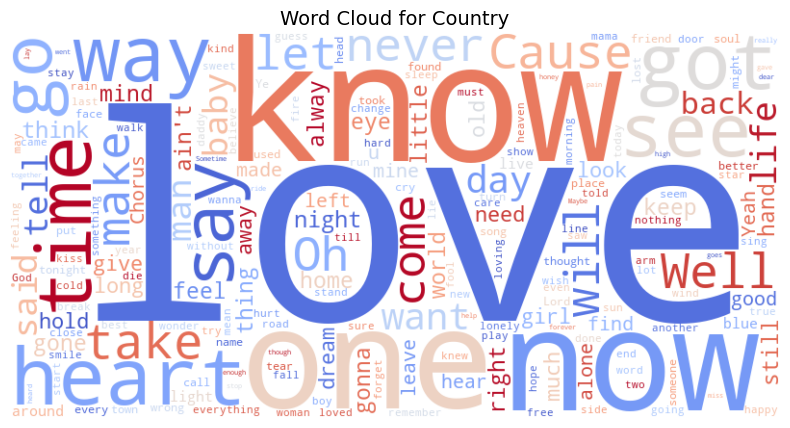

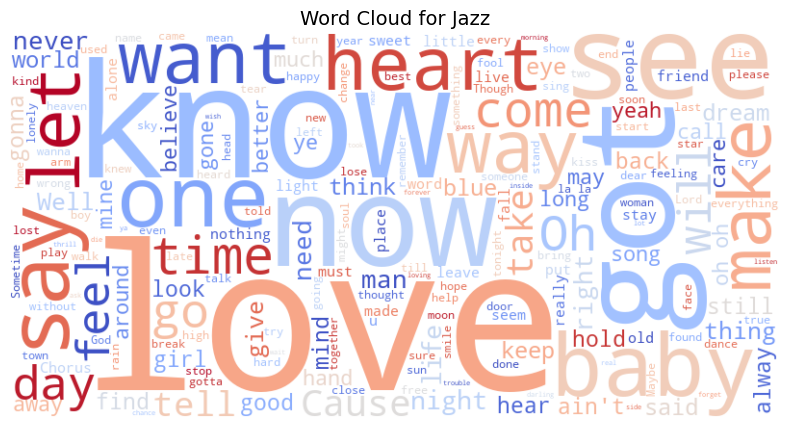

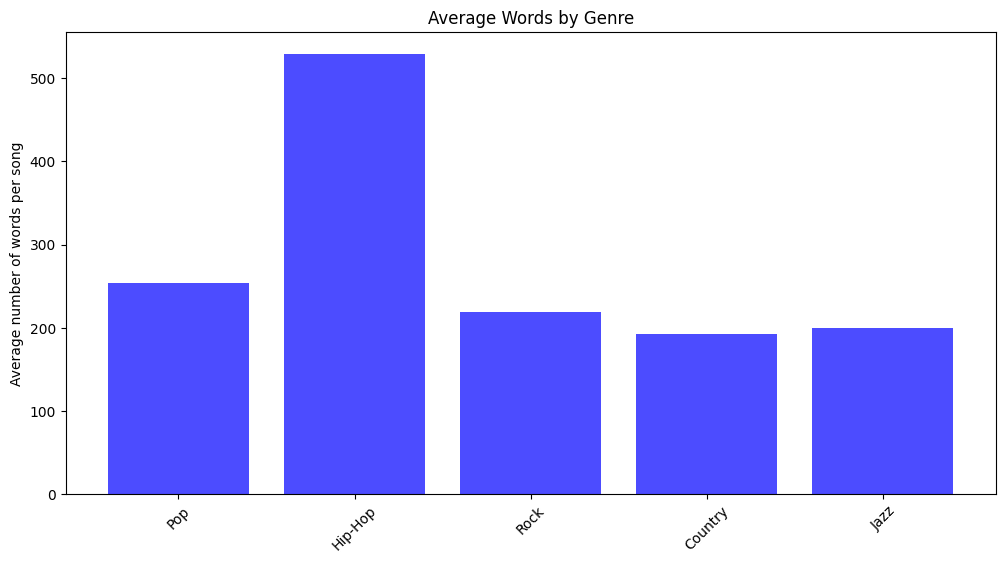

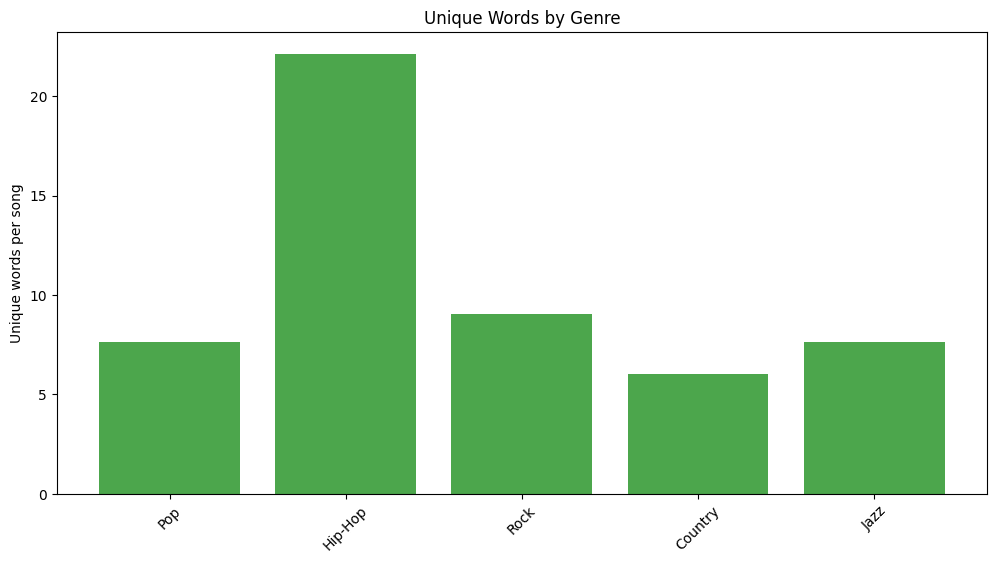

In [40]:
data_analysis(df)

# 3/ Train the model

In [41]:
df_train = df
df_train.head(10)

,song,lyrics,genre,clean_lyrics
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...
5,all-i-could-do-was-cry,I heard\nChurch bells ringing\nI heard\nA choi...,Pop,hear church bell ring hear choir singing see l...
6,once-in-a-lifetime,This is just another day that I would spend\nW...,Pop,day spend wait right stare night wish feel war...
7,slow-love,[Verse 1:]\nI read all of the magazines\nwhile...,Pop,read magazine waiting say wait get stuck town ...
8,why-don-t-you-love-me,"N-n-now, honey\nYou better sit down and look a...",Pop,nnnow honey well sit look bump yo head love ta...
9,save-the-hero,I lay alone awake at night\nSorrow fills my ey...,Pop,lie awake night sorrow fill eye strong cry des...


In [42]:
from sklearn.preprocessing import LabelEncoder

# Tạo đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng Label Encoding vào danh sách genres trong DataFrame df_train
encoded_genres = label_encoder.fit_transform(df_train["genre"].values)

# Hiển thị kết quả
for genre, encoded in zip(df_train["genre"].values, encoded_genres):
    print(f"{genre}: {encoded}")

Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3
Pop: 3

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train["clean_lyrics"], encoded_genres,
                                                    test_size=0.2, shuffle=True, random_state=42)

## Word2Vec

In [44]:
def spacy_tokenize(text):
    return [token.text for token in nlp(text) if not token.is_punct and not token.is_space]

In [45]:
X_train_tok = [[token.text for token in nlp(text)] for text in X_train]
X_test_tok = [[token.text for token in nlp(text)] for text in X_test]

In [46]:
from gensim.models import Word2Vec


# Class để tạo vector trung bình cho từng câu
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # Nếu văn bản rỗng, trả về vector 0 với cùng số chiều
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


# Áp dụng tokenization với spaCy
df['clean_lyrics_tok'] = df['clean_lyrics'].apply(spacy_tokenize)

# Huấn luyện mô hình Word2Vec
model = Word2Vec(sentences=df['clean_lyrics_tok'], vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Chuyển Word2Vec model thành dict {word: vector}
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))

# Áp dụng MeanEmbeddingVectorizer
modelw2v = MeanEmbeddingVectorizer(w2v)

In [47]:
# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw2v.transform(X_train_tok)
X_test_vectors_w2v = modelw2v.transform(X_test_tok)

In [48]:
from sklearn.metrics import classification_report


def evaluate_model(model_applied, X_train_evaluate, y_train_evaluate, X_test_evaluate, y_test_evaluate):
    model_applied.fit(X_train_evaluate, y_train_evaluate)
    y_pred = model_applied.predict(X_test_evaluate)
    print(classification_report(y_test_evaluate, y_pred))

## Models

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Huấn luyện lại mô hình với tham số tối ưu
best_lr = OneVsRestClassifier(LogisticRegression(C=10, max_iter=500, penalty='l2', solver='saga', random_state=43))
best_lr.fit(X_train_vectors_w2v, y_train)

# Đánh giá mô hình
print("=== Logistic Regression ===")
evaluate_model(best_lr, X_train_vectors_w2v, y_train, X_test_vectors_w2v, y_test)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.48      0.51      0.49      1017
           1       0.76      0.81      0.78       999
           2       0.50      0.43      0.46       996
           3       0.42      0.40      0.41       978
           4       0.44      0.46      0.45      1010

    accuracy                           0.52      5000
   macro avg       0.52      0.52      0.52      5000
weighted avg       0.52      0.52      0.52      5000



### SVM

In [50]:
from sklearn.svm import SVC

# Huấn luyện mô hình với tham số tối ưu
svm = SVC(C=1, gamma=1, kernel='rbf', random_state=47)
svm.fit(X_train_vectors_w2v, y_train)

print("=== SVM ===")
evaluate_model(svm, X_train_vectors_w2v, y_train, X_test_vectors_w2v, y_test)

=== SVM ===
              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1017
           1       0.90      0.75      0.82       999
           2       0.76      0.39      0.52       996
           3       0.34      0.73      0.47       978
           4       0.57      0.40      0.47      1010

    accuracy                           0.55      5000
   macro avg       0.63      0.55      0.56      5000
weighted avg       0.63      0.55      0.56      5000



### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Huấn luyện mô hình với tham số tối ưu
dt = DecisionTreeClassifier(
    max_depth=None,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini',
    random_state=45
)
dt.fit(X_train_vectors_w2v, y_train)

# Đánh giá mô hình
print("=== Decision Tree ===")
evaluate_model(dt, X_train_vectors_w2v, y_train, X_test_vectors_w2v, y_test)

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.40      0.43      0.41      1017
           1       0.71      0.73      0.72       999
           2       0.43      0.45      0.44       996
           3       0.36      0.35      0.36       978
           4       0.36      0.32      0.34      1010

    accuracy                           0.46      5000
   macro avg       0.45      0.46      0.45      5000
weighted avg       0.45      0.46      0.45      5000



### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Huấn luyện mô hình với tham số tối ưu
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    n_estimators=400,
    criterion='gini',
    random_state=46
)
rf.fit(X_train_vectors_w2v, y_train)

# Đánh giá mô hình
print("=== Random Forest ===")
evaluate_model(rf, X_train_vectors_w2v, y_train, X_test_vectors_w2v, y_test)

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      1017
           1       0.83      0.82      0.82       999
           2       0.63      0.51      0.56       996
           3       0.46      0.50      0.48       978
           4       0.49      0.50      0.49      1010

    accuracy                           0.58      5000
   macro avg       0.59      0.58      0.58      5000
weighted avg       0.59      0.58      0.58      5000



# 4/ Testing

In [53]:
def preprocess_lyrics(text, ):
    lyrics_test = preprocess(text)
    return lyrics_test

In [54]:
def preprocess_lyrics_w2v(text):
    if not text:
        print("🚫 Không có lyrics.")
        return None

    preprocessed_lyrics = preprocess_lyrics(text)

    if preprocessed_lyrics != "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ.":
        doc = nlp(preprocessed_lyrics)
        tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
        return tokens

    return "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ."

In [55]:
df.head()

,song,lyrics,genre,clean_lyrics,clean_lyrics_tok
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...,"[baby, know, going, cut, right, chase, woman, ..."
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...,"[play, easy, like, sure, way, sure, thing, com..."
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...,"[search, tenderness, hard, find, love, need, l..."
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...,"[write, book, stand, title, book, life, superm..."
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...,"[party, people, people, party, pop, sit, look,..."


In [56]:
# Chuyển lyrics thành vector trung bình của Word2Vec
def lyrics_to_w2v_vector(lyrics):
    return modelw2v.transform([lyrics]).reshape(1, -1)

In [57]:
w2v_matrix = modelw2v.transform(df['clean_lyrics_tok'])
print(w2v_matrix)

[[-0.5935577  -0.02452059  0.48402426 ...  0.7039005   0.4009641
  -0.6354143 ]
 [-0.7199216  -0.5121063   0.31773445 ...  0.48894796  0.03744365
  -0.44453377]
 [-0.24291386 -0.15810429  0.1488116  ...  0.4399928   0.17590271
  -0.7015444 ]
 ...
 [-0.8240628  -0.52573884  0.05846017 ...  0.68018067 -0.3011204
  -0.2528203 ]
 [-0.56769735 -0.2685452  -0.16724053 ...  0.26129794  0.1712116
  -0.49861676]
 [-0.4037001  -0.5022521  -0.22939187 ...  1.0312562  -0.3693821
  -0.73323685]]


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

df_cosine_similarity = df


def w2v_lyrics_similarity(test_lyrics_w2v):
    test_vector = lyrics_to_w2v_vector(test_lyrics_w2v).reshape(1, -1)

    similarities = cosine_similarity(test_vector, w2v_matrix)[0]

    df_sim = pd.DataFrame({
        "Song": df_cosine_similarity["song"].values,
        "Lyrics": df_cosine_similarity["lyrics"].values,
        "Similarity": similarities
    })
    df_sim = df_sim.sort_values(by="Similarity", ascending=False)

    return df_sim.head(5)

In [59]:
# Hàm dự đoán thể loại của bài hát
def predict_genre(model_prediction, w2v_vector):
    # Dự đoán thể loại
    predicted_genre = model_prediction.predict(w2v_vector)[0]

    return predicted_genre

In [60]:
import whisper


def transcribe_lyric_by_whisper(audio_path):
    """Dùng Whisper để trích xuất lyric từ file nhạc"""
    try:
        print("Đang chuyển đổi audio thành text bằng Whisper...")
        model_to_load = whisper.load_model("large")
        result = model_to_load.transcribe(audio_path, fp16=False)
        lyrics_transcribe = result["text"]

        print("🎤 Lời bài hát được trích xuất thành công!")
        return lyrics_transcribe
    except Exception as e:
        print(f"❌ Lỗi khi trích xuất lời bài hát: {e}")
        return None

In [61]:
import subprocess


def separate_vocals(input_file, output_folder="demucs_output"):
    """Chạy Demucs để tách giọng hát từ file MP3 và đổi tên file kết quả."""

    # Kiểm tra file đầu vào có tồn tại không
    if not os.path.exists(input_file):
        print(f"❌ Lỗi: File đầu vào '{input_file}' không tồn tại!")
        return None

    try:
        # Tạo thư mục output nếu chưa tồn tại
        os.makedirs(output_folder, exist_ok=True)

        filename = os.path.splitext(os.path.basename(input_file))[0]
        vocals_dir = os.path.join(output_folder, "mdx_extra_q", filename)
        vocals_path = os.path.join(vocals_dir, "vocals.mp3")
        new_vocals_path = os.path.join(vocals_dir, f"{filename}_vocals.mp3")

        if os.path.exists(new_vocals_path):
            print(f"✅ File vocals đã tồn tại: {new_vocals_path}")
            return new_vocals_path

        # Chạy Demucs để tách giọng hát
        command = [
            "demucs", "-o", output_folder, "--mp3",
            "-n", "mdx_extra_q", input_file
        ]
        subprocess.run(command, check=True)

        print(f"✅ Tách giọng hát thành công! Kết quả lưu tại: {output_folder}")

        # Kiểm tra file vocals.mp3 có được tạo ra không
        if not os.path.exists(vocals_path):
            print(f"❌ Lỗi: File vocals.mp3 không tồn tại trong thư mục {vocals_dir}")
            return None

        # Đổi tên file
        os.rename(vocals_path, new_vocals_path)
        print(f"✅ Đã đổi tên file thành: {new_vocals_path}")

        return new_vocals_path

    except subprocess.CalledProcessError as e:
        print(f"❌ Lỗi khi chạy Demucs: {e}")
        return None

In [62]:
def slow_down_audio_ffmpeg(input_file, output_folder="final_output", speed_factor=0.85):
    """Làm chậm audio bằng FFmpeg và loại bỏ khoảng lặng"""
    try:
        # Tách tên file không có phần mở rộng
        filename = os.path.splitext(os.path.basename(input_file))[0]

        # Tạo thư mục output nếu chưa tồn tại
        os.makedirs(output_folder, exist_ok=True)

        # Tạo đường dẫn cho file đã làm chậm
        slowed_audio = os.path.join(output_folder, f"{filename}_slowdown.wav")

        # Lệnh FFmpeg làm chậm audio
        command = [
            "ffmpeg", "-i", input_file,
            "-filter:a", f"atempo={speed_factor}", "-vn",
            "-y", slowed_audio  # Ghi đè file nếu đã tồn tại
        ]
        subprocess.run(command, check=True)

        # Gọi hàm remove_silence để xử lý file đã làm chậm
        final_output = os.path.join(output_folder, f"{filename}_final.wav")
        result = remove_silence(slowed_audio, final_output)

        if os.path.exists(slowed_audio):
            os.remove(slowed_audio)

        return result
    except subprocess.CalledProcessError as e:
        print(f"❌ Lỗi khi chạy FFmpeg: {e}")
        return None


def remove_silence(input_audio, output_audio, silence_threshold="-40dB", min_silence_duration="0.5"):
    """Loại bỏ khoảng lặng trong file audio bằng FFmpeg"""
    try:
        command = [
            "ffmpeg",
            "-i", input_audio,
            "-af",
            f"silenceremove=stop_periods=-1:stop_duration={min_silence_duration}:stop_threshold={silence_threshold}",
            "-y",
            output_audio
        ]
        subprocess.run(command, check=True)
        return output_audio
    except subprocess.CalledProcessError as e:
        print(f"❌ Lỗi khi loại bỏ khoảng lặng: {e}")
        return None

## Cosine Similarity

In [63]:
lyrics_similarity = """
Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is fallin' too
I'm in love with your body
And last night, you were in my room
And now my bed sheets smell like you
Every day, discoverin' somethin' brand new
Well, I'm in love with your body

Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you

One week in, we let the story begin
We're goin' out on our first date (Mm)
You and me are thrifty, so go all-you-can-eat
Fill up your bag and I fill up a plate (Mm)
We talk for hours and hours about the sweet and the sour
And how your family is doin' okay (Mm)
And leave and get in a taxi, and kiss in the back seat
Tell the driver make the radio play and I'm singin' like

Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you
"""
lyrics_similarity_1 = """
    Days like this don't get much better
    Top down, good fam, good weather
    Days like this, we don't miss, never
    Yeah, yeah
    Last night, things got a little bit crazy
    Pulled up doin' 'bout 180
    Life goes fast, so there ain't no maybes
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me them stars out, four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road

    Wastin' time ain't overrated
    Not when you're celebrated
    Raise that glass, we're all here waitin'
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me that truck, that four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it up high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
"""
lyrics_similarity_2 = """
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
So what you trying to do to me
It's like we can't stop, we're enemies
But we get along when I'm inside you, eh
You're like a drug that's killing me
I cut you out entirely
But I get so high when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
So if I run it's not enough
You're still in my head forever stuck
So you can do what you wanna do, eh
I love your lies I'll eat 'em up
But don't deny the animal
That comes alive when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no girl don't lie)
You can't deny, ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
Yo
Whoa
Whoa
Just like animals
Animals
Like animals-mals
Just like animals (yeah)
Animals (yeah)
Like animals-mals (yeah)
Ow
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no, girl don't lie)
You can't deny-ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
"""
lyrics_similarity_3 = """
Your morning eyes, I could stare like watching stars
I could walk you by, and I'll tell without a thought
You'd be mine, would you mind if I took your hand tonight?
Know you're all that I want this life

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?

My love will always stay by you
I'll keep it safe, so don't you worry a thing
I'll tell you I love you more
It's stuck with you forever, so promise you won't let it go
I'll trust the universe will always bring me to you

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?
"""

In [64]:
w2v_lyrics_similarity(lyrics_similarity)

,Song,Lyrics,Similarity
5804,a-to-z,"A , and now it's time\nB , because I like this...",0.855306
22087,kalamazoo,"A, B, C, D, E, F, G, H, I got a gal\n(In Kalam...",0.738029
3680,12d3,I'm 2D\nWon't you buy me\nPiano chord\nDiction...,0.712966
22068,i-ve-got-a-gal-in-kalamazoo,"A, B, C, D, E, F, G, H\nI got a gal in Kalamaz...",0.681614
12347,cali-boyz,This is my home feel me\nY'all must think it's...,0.671936


In [65]:
w2v_lyrics_similarity(lyrics_similarity_1)

,Song,Lyrics,Similarity
5804,a-to-z,"A , and now it's time\nB , because I like this...",0.857992
22087,kalamazoo,"A, B, C, D, E, F, G, H, I got a gal\n(In Kalam...",0.748517
3680,12d3,I'm 2D\nWon't you buy me\nPiano chord\nDiction...,0.713515
22068,i-ve-got-a-gal-in-kalamazoo,"A, B, C, D, E, F, G, H\nI got a gal in Kalamaz...",0.696781
12347,cali-boyz,This is my home feel me\nY'all must think it's...,0.693550


In [66]:
w2v_lyrics_similarity(lyrics_similarity_2)

,Song,Lyrics,Similarity
5804,a-to-z,"A , and now it's time\nB , because I like this...",0.865308
22087,kalamazoo,"A, B, C, D, E, F, G, H, I got a gal\n(In Kalam...",0.743916
3680,12d3,I'm 2D\nWon't you buy me\nPiano chord\nDiction...,0.717716
22068,i-ve-got-a-gal-in-kalamazoo,"A, B, C, D, E, F, G, H\nI got a gal in Kalamaz...",0.692070
12347,cali-boyz,This is my home feel me\nY'all must think it's...,0.690382


In [67]:
w2v_lyrics_similarity(lyrics_similarity_3)

,Song,Lyrics,Similarity
5804,a-to-z,"A , and now it's time\nB , because I like this...",0.854633
22087,kalamazoo,"A, B, C, D, E, F, G, H, I got a gal\n(In Kalam...",0.745770
3680,12d3,I'm 2D\nWon't you buy me\nPiano chord\nDiction...,0.699772
12347,cali-boyz,This is my home feel me\nY'all must think it's...,0.694353
22068,i-ve-got-a-gal-in-kalamazoo,"A, B, C, D, E, F, G, H\nI got a gal in Kalamaz...",0.692363


## Genre Classification

### a - Provides Lyrics

In [68]:
lyrics = """
Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is fallin' too
I'm in love with your body
And last night, you were in my room
And now my bed sheets smell like you
Every day, discoverin' somethin' brand new
Well, I'm in love with your body

Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you

One week in, we let the story begin
We're goin' out on our first date (Mm)
You and me are thrifty, so go all-you-can-eat
Fill up your bag and I fill up a plate (Mm)
We talk for hours and hours about the sweet and the sour
And how your family is doin' okay (Mm)
And leave and get in a taxi, and kiss in the back seat
Tell the driver make the radio play and I'm singin' like

Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you
"""
lyrics_1 = """
    Days like this don't get much better
    Top down, good fam, good weather
    Days like this, we don't miss, never
    Yeah, yeah
    Last night, things got a little bit crazy
    Pulled up doin' 'bout 180
    Life goes fast, so there ain't no maybes
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me them stars out, four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road

    Wastin' time ain't overrated
    Not when you're celebrated
    Raise that glass, we're all here waitin'
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me that truck, that four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it up high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
"""
lyrics_2 = """
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
So what you trying to do to me
It's like we can't stop, we're enemies
But we get along when I'm inside you, eh
You're like a drug that's killing me
I cut you out entirely
But I get so high when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
So if I run it's not enough
You're still in my head forever stuck
So you can do what you wanna do, eh
I love your lies I'll eat 'em up
But don't deny the animal
That comes alive when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no girl don't lie)
You can't deny, ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
Yo
Whoa
Whoa
Just like animals
Animals
Like animals-mals
Just like animals (yeah)
Animals (yeah)
Like animals-mals (yeah)
Ow
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no, girl don't lie)
You can't deny-ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
"""
lyrics_3 = """
Your morning eyes, I could stare like watching stars
I could walk you by, and I'll tell without a thought
You'd be mine, would you mind if I took your hand tonight?
Know you're all that I want this life

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?

My love will always stay by you
I'll keep it safe, so don't you worry a thing
I'll tell you I love you more
It's stuck with you forever, so promise you won't let it go
I'll trust the universe will always bring me to you

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?
"""

In [69]:
w2v = lyrics_to_w2v_vector(lyrics)
w2v_1 = lyrics_to_w2v_vector(lyrics_1)
w2v_2 = lyrics_to_w2v_vector(lyrics_2)
w2v_3 = lyrics_to_w2v_vector(lyrics_3)

* Country: 0
* Hip-Hop: 1
* Jazz: 2
* Pop: 3
* Rock: 4

In [79]:
predict_genre(rf, w2v)

2

In [80]:
predict_genre(rf, w2v_1)

2

In [81]:
predict_genre(rf, w2v_2)

2

In [82]:
predict_genre(rf, w2v_3)

2

### b - WhisperAPI

In [74]:
def process_audio(input_file):
    filename = os.path.splitext(os.path.basename(input_file))[0]

    vocals_path = separate_vocals(input_file)  # Tách vocal từ file gốc

    if vocals_path and os.path.exists(vocals_path):
        final_output_path = rf"final_output\{filename}_vocals_final.wav"

        if os.path.exists(final_output_path):
            print(f"✅ File đã tồn tại, không cần xử lý lại: {final_output_path}")
            return final_output_path

        processed_audio = slow_down_audio_ffmpeg(vocals_path)
        if processed_audio:
            print(f"🎵 Audio đã xử lý thành công: {processed_audio}")
        else:
            print(f"❌ Lỗi khi làm chậm audio cho {vocals_path}")

        return processed_audio

    print(f"❌ Lỗi: Không tìm thấy file vocals tại {vocals_path}")
    return None